In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/submission.csv
/kaggle/input/titanic-datasets/titanic.csv
/kaggle/input/titaniccsv/titanic.csv
/kaggle/input/titanicdataset-traincsv/train.csv
/kaggle/input/test-file/tested.csv
/kaggle/input/titanic-disaster-dataset/submission.csv
/kaggle/input/titanic-disaster-dataset/train.csv
/kaggle/input/titanic-disaster-dataset/test.csv
/kaggle/input/titanic3/titanic3.xls
/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv
/kaggle/input/d/ibrahimelsayed182/titanic-dataset/Titanic.csv
/kaggle/input/d/azeembootwala/titanic/train_data.csv
/kaggle/input/d/azeembootwala/titanic/test_data.csv
/kaggle/input/d/sakshisatre/titanic-dataset/The Titanic dataset.csv
/kaggle/input/d/sakshisatre/titanic-dataset/Titanic Dataset.csv
/kaggle/input/d/yasserh/titanic-dataset/Titanic-Dataset.csv
/kaggle/input/d/heptapod/titanic/train_and_test2.csv
/kaggle/input/d/hardikgarg03/titanic/gender_submission.csv
/kaggle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


# Data Cleaning

In [5]:
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [6]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Handling Null Values  🚢</h3>

**The 'Cabin' column contains numerous null values, so we will drop it.**



In [7]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [8]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [10]:
train['Embarked'].fillna('S',inplace=True)

In [11]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Unified DataFrame for Easier Manipulation 🧑‍💻</h3>


In [12]:
df=pd.concat([train,test],sort=True).reset_index(drop=True)

In [13]:
df.shape

(1309, 11)

In [14]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [15]:
df.corr(numeric_only=True)['Age'].abs()

Age            1.000000
Fare           0.178314
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

In [16]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [17]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [18]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Extracting Titles from Names and Adding as a Separate Column 📜</h3>


In [19]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]

In [20]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [21]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [22]:
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Family Column by Combining Sibling and Parent Child Column 👨‍👩‍👧‍👦</h3>



In [23]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1

In [24]:
df.sample(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size
937,45.0,C,29.7000,"Chevre, Mr. Paul Romaine",0,938,1,male,0,NaN,PC 17594,Mr,1
981,22.0,S,13.9000,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",0,982,3,female,1,NaN,347072,Mrs,2
595,36.0,S,24.1500,"Van Impe, Mr. Jean Baptiste",1,596,3,male,1,0.0,345773,Mr,3
362,45.0,C,14.4542,"Barbara, Mrs. (Catherine David)",1,363,3,female,0,0.0,2691,Mrs,2
664,20.0,S,7.9250,"Lindqvist, Mr. Eino William",0,665,3,male,1,1.0,STON/O 2. 3101285,Mr,2
69,26.0,S,8.6625,"Kink, Mr. Vincenz",0,70,3,male,2,0.0,315151,Mr,3
320,22.0,S,7.2500,"Dennis, Mr. Samuel",0,321,3,male,0,0.0,A/5 21172,Mr,1
747,30.0,S,13.0000,"Sinkkonen, Miss. Anna",0,748,2,female,0,1.0,250648,Miss,1
523,44.0,C,57.9792,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",1,524,1,female,0,1.0,111361,Mrs,2
298,42.0,S,30.5000,"Saalfeld, Mr. Adolphe",0,299,1,male,0,1.0,19988,Mr,1


In [25]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [26]:
df.sample(10)

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
1106,42.0,S,42.5000,1107,1,male,NaN,Mr,1
18,31.0,S,18.0000,19,3,female,0.0,Mrs,2
181,29.5,C,15.0500,182,2,male,0.0,Mr,1
364,25.0,Q,15.5000,365,3,male,0.0,Mr,2
72,21.0,S,73.5000,73,2,male,0.0,Mr,1
14,14.0,S,7.8542,15,3,female,0.0,Miss,1
310,24.0,C,83.1583,311,1,female,1.0,Miss,1
490,25.0,S,19.9667,491,3,male,0.0,Mr,2
950,36.0,C,262.3750,951,1,female,NaN,Miss,1
1124,25.0,Q,7.8792,1125,3,male,NaN,Mr,1


In [27]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [28]:
df['Family_size']=df['Family_size'].apply(family_size)


# Exploratory Data Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 92.2+ KB


In [30]:
df['Age'] = df['Age'].astype('int64')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   int64  
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Finding Survival Correlation with Every Other Column 📊</h3>

**We will analyze the correlation between survival and every other column to understand their relationships.**


In [32]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
---------- 



<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Adding Graphs to Clarify the Picture 📈</h3>

**We will include some visualizations to make the data and its correlations clearer.**


In [33]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived']==0]['Age'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived']==1]['Age'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()

In [34]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Fare'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Fare'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

In [35]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Family_size'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Family_size'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family Size',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

In [36]:
from plotly.subplots import make_subplots
col = ['Embarked', 'Pclass', 'Sex', 'Title']

fig = make_subplots(rows=1, cols=len(col), subplot_titles=col)

for i, c in enumerate(col, start=1):
    grouped_data = df.groupby([c, 'Survived']).size().reset_index(name='Count')
    
    survived_data = grouped_data[grouped_data['Survived'] == 1]
    not_survived_data = grouped_data[grouped_data['Survived'] == 0]
    
    fig.add_trace(go.Bar(x=survived_data[c], y=survived_data['Count'], name='Survived', marker_color='green'), row=1, col=i)
    fig.add_trace(go.Bar(x=not_survived_data[c], y=not_survived_data['Count'], name='Not Survived', marker_color='red'), row=1, col=i)
    
    fig.update_xaxes(title_text=c, row=1, col=i)
    fig.update_yaxes(title_text='Count', row=1, col=i)

# Update figure layout
fig.update_layout(
    title='Countplot of Categorical Variables by Survival',
    height=400,  
    showlegend=True,
    barmode='group',  
)

# Show figure
fig.show()

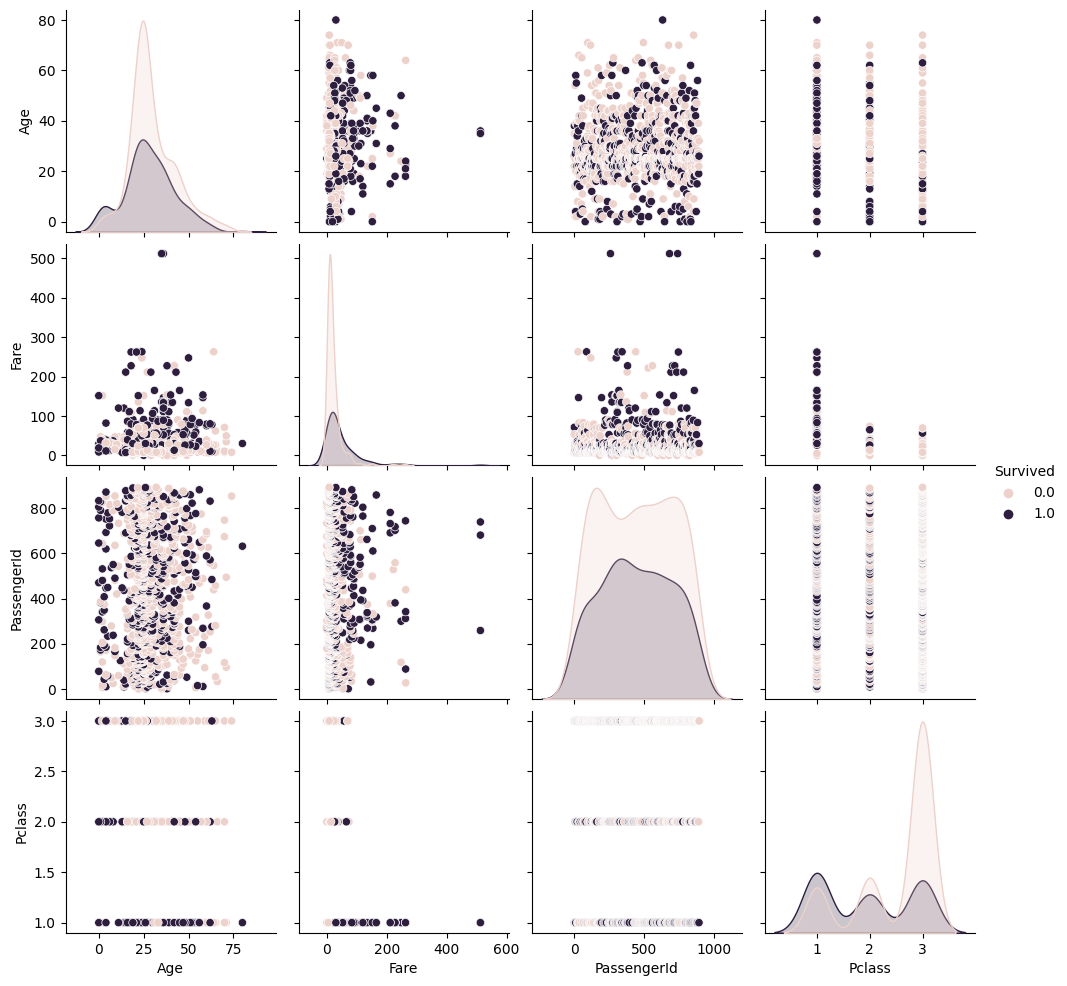

In [37]:
sns.pairplot(df,hue='Survived')

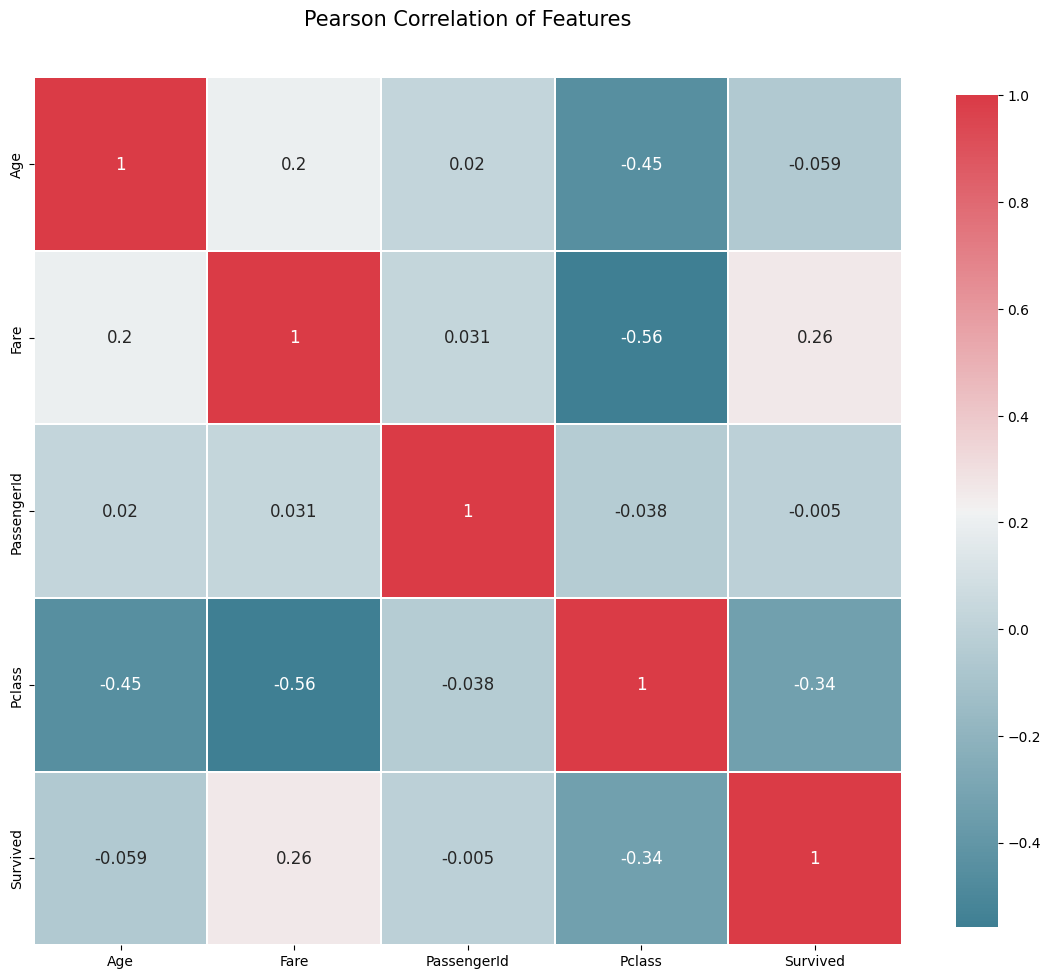

In [38]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(numeric_only=True), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


# Feature Engineering¶

In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


In [40]:
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Separating the Data into Train and Test Sets 🧪</h3>

**We will divide the data into training and testing sets to evaluate the model's performance.**


In [41]:
train = df.loc[:890]
test = df.loc[891:]

In [42]:
test.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
891,34,Q,7.8292,892,3,male,NaN,Mr,Alone
892,47,S,7.0000,893,3,female,NaN,Mrs,Small
893,62,Q,9.6875,894,2,male,NaN,Mr,Alone
894,27,S,8.6625,895,3,male,NaN,Mr,Alone
895,22,S,12.2875,896,3,female,NaN,Mrs,Small


In [43]:
test.drop(columns=['Survived'],inplace=True)

In [44]:
train['Survived'] = train['Survived'].astype('int64')

In [45]:
train.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0,Mr,Small
1,38,C,71.2833,2,1,female,1,Mrs,Small
2,26,S,7.9250,3,3,female,1,Miss,Alone
3,35,S,53.1000,4,1,female,1,Mrs,Small
4,35,S,8.0500,5,3,male,0,Mr,Alone


In [46]:
train.shape,test.shape

((891, 9), (418, 8))

In [47]:
train = train.drop("PassengerId", axis=1)

In [48]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

In [49]:
X_train.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
0,22,S,7.2500,3,male,Mr,Small
1,38,C,71.2833,1,female,Mrs,Small
2,26,S,7.9250,3,female,Miss,Alone
3,35,S,53.1000,1,female,Mrs,Small
4,35,S,8.0500,3,male,Mr,Alone


In [50]:
X_train.shape,y_train.shape

((891, 7), (891,))

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Pipeline with Column Transformer 🔄</h3>

**We will build a pipeline that incorporates a Column Transformer to streamline preprocessing and feature engineering.**


In [51]:
num_cat_tranformation=ColumnTransformer([
                                    ('scaling',MinMaxScaler(),[0,2]),
                                    ('onehotencolding1',OneHotEncoder(),[1,3]),
                                    ('ordinal',OrdinalEncoder(),[4]),
                                    ('onehotencolding2',OneHotEncoder(),[5,6])
                                    ],remainder='passthrough')

In [52]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [53]:
from sklearn import set_config
set_config(display='diagram')

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [55]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo)
    ])

# Model Training

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Evaluating Various Machine Learning Models to Find the Best Performer 🤖</h3>

**We will test different machine learning models to identify which one provides the best performance for our data.**


In [56]:
algorithms=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # XGBoost
    XGBClassifier()
]

In [57]:
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())
    
#     print(f'Model: {algo.__class__.__name__}, CV Accuracy: {scores.mean()}')
#     print('\n')

In [58]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [59]:
model_df.sort_values(by='Accuracy', ascending=False, inplace=True)

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Tuning the Top 3 Machine Learning Models for Better Results 🔧</h3>

**We will focus on tuning the top 3 performing models from our data frame to enhance their performance and achieve better results.**


In [60]:
model_df

,Model,Accuracy
16,LinearSVC,0.827322
19,LinearDiscriminantAnalysis,0.825923
8,RidgeClassifierCV,0.825923
15,NuSVC,0.824495
6,LogisticRegressionCV,0.823116
0,AdaBoostClassifier,0.818911
14,SVC,0.818861
3,GradientBoostingClassifier,0.813277
5,GaussianProcessClassifier,0.811819
13,KNeighborsClassifier,0.806205


In [61]:
algo1 = ensemble.RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

algo2 =ensemble.GradientBoostingClassifier(max_depth= 1, max_features='auto', n_estimators=3, random_state=42, warm_start= True)
algo3=linear_model.RidgeClassifierCV()

In [62]:
pipe1=Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo1)
    ])

In [63]:
pipe1.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.9s finished


Pipeline(steps=[('num_cat_transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  [0, 2]),
                                                 ('onehotencolding1',
                                                  OneHotEncoder(), [1, 3]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [4]),
                                                 ('onehotencolding2',
                                                  OneHotEncoder(), [5, 6])])),
                ('bins',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Kbins',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=15),
                                                  [0, 2])])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, max_features='auto',
                                        min_samples_leaf=6, min_samples_split=6,
                                        n_estimators=1750, n_jobs=-1,
                                        oob_score=True, random_state=42,
                                        verbose=1))])

In [64]:
y_pred = pipe1.predict(X_test)
accuracy_score(y_test,y_pred)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.5s finished


0.8659217877094972

In [65]:
submission = pd.DataFrame()
submission["PassengerId"] = test["PassengerId"]
submission

,PassengerId
891,892
892,893
893,894
894,895
895,896
...,...
1304,1305
1305,1306
1306,1307
1307,1308


In [66]:
test = test.drop("PassengerId", axis=1)
test.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
891,34,Q,7.8292,3,male,Mr,Alone
892,47,S,7.0000,3,female,Mrs,Small
893,62,Q,9.6875,2,male,Mr,Alone
894,27,S,8.6625,3,male,Mr,Alone
895,22,S,12.2875,3,female,Mrs,Small


In [67]:
predictions = pipe1.predict(test)
submission["Survived"] =  predictions
submission.to_csv("submission.csv", index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.7s finished
